# Задание 3. Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [16]:
import numpy as np
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [378]:
class RidgeRegression:
    def __init__(self, alpha=1e-1):
        self.alpha = alpha
        
    def fit(self, X, y):
        X = np.c_[[1]*X.shape[0], X]
        self.weights = np.linalg.inv(X.T@X - self.alpha*np.eye(X.T.shape[0]))@X.T@y
        
    def predict(self, X):
        try:
            X = np.c_[[1]*X.shape[0], X]
            return X@self.weights.T
        except Exception:
            raise ValueError("Something went wrong")
     
    @property
    def _coefs(self):
        return self.weights
    
    def __str__(self):
        return f'RidgeRegression with alpha={self.alpha}'
    
    def __repr__(self):
        return f'RidgeRegression with alpha={self.alpha}'
            
    
def mean_squared_error(y_true, y_pred):
    return sum((y_true - y_pred)**2)/y_true.shape[0]
            
ridge = RidgeRegression(1e-5)
ridge.fit(X, Y)

mean_squared_error(Y, ridge.predict(X))


94.91679545691483

In [ ]:
alphas = np.linspace(0, 4, 100)
pred = 
for a in alphas:
    r = RidgeRegression(a)
    r.fit(X, Y)
    

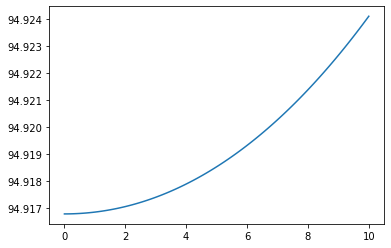

In [408]:
#Task 1
import matplotlib.pyplot as plt

alphas = np.linspace(1e1, 1e-3, 100)
losses = []
for alpha in alphas:
    ridge = RidgeRegression(alpha)
    ridge.fit(X, Y)
    pred = ridge.predict(X)
    losses.append(mean_squared_error(Y, pred))
    
plt.plot(alphas, losses)

In [390]:
#Task 2

def cross_val(X, Y):
    cv = 5
    x_len = X.shape[0]
    idxes = list(range(x_len))
    np.random.shuffle(idxes)
    
    splits = []
    for split in range(cv):
        splits.append([X[x_len//5*split:x_len//5*(split+1)], Y[x_len//5*split:x_len//5*(split+1)]])
        
    return splits

splits = cross_val(X, Y)


In [419]:
#Task 3
import itertools

class GridSearch:
    def __init__(self, model, alphas, cv=5, verbose = 0):
        self.estimator = model
        self.alphas = alphas
        self.cv = cv
        self.verbose = verbose
        
        self.training_curve = []
        self.validation_curve = []
            
            
    def cross_val(X, Y):
        cv = 5
        x_len = X.shape[0]
        idxes = list(range(x_len))
        np.random.shuffle(idxes)
        
        X = X[idxes]
        Y = Y[idxes]

        splits = []
        for split in range(cv):
            splits.append([X[x_len//5*split:x_len//5*(split+1)], Y[x_len//5*split:x_len//5*(split+1)]])

        return splits
    
    @staticmethod
    def mean_squared_error(y_true, y_pred):
        return sum((y_true - y_pred)**2)/y_true.shape[0]

    def fit(self, X, Y):
        splits = cross_val(X, Y)
        all_params = list(itertools.product(alphas, list(range(self.cv))))
        self.best_metric = np.inf
        for alpha, split in all_params:
            curr_model = self.estimator.__class__(alpha)
            print(curr_model)
            x_test = splits[split][0]
            y_test = splits[split][1]
            
            x_train = np.concatenate([splits[x][0] for x in range(self.cv) if x != split])
            y_train = np.concatenate([splits[x][1] for x in range(self.cv) if x != split])
            
            
            curr_model.fit(x_train, y_train)
            
            
            curr_metric = self.mean_squared_error(y_test, curr_model.predict(x_test))
            if curr_metric < self.best_metric:
                self.best_estimator_ = curr_model
                self.best_param = alpha
                self.best_metric = curr_metric
                
            if self.verbose > 0:
                print(f'Alpha: {alpha}, cv: {split}, MSE: {curr_metric}')
            

                                       
                
ridge = RidgeRegression()   
alphas = np.linspace(1e-1, 1e3, 100)

grid = GridSearch(ridge, alphas, verbose=0) 

grid.fit(X, Y)
            
        
        
        
        
    
    

RidgeRegression with alpha=0.1
RidgeRegression with alpha=0.1
RidgeRegression with alpha=0.1
RidgeRegression with alpha=0.1
RidgeRegression with alpha=0.1
RidgeRegression with alpha=10.2
RidgeRegression with alpha=10.2
RidgeRegression with alpha=10.2
RidgeRegression with alpha=10.2
RidgeRegression with alpha=10.2
RidgeRegression with alpha=20.3
RidgeRegression with alpha=20.3
RidgeRegression with alpha=20.3
RidgeRegression with alpha=20.3
RidgeRegression with alpha=20.3
RidgeRegression with alpha=30.4
RidgeRegression with alpha=30.4
RidgeRegression with alpha=30.4
RidgeRegression with alpha=30.4
RidgeRegression with alpha=30.4
RidgeRegression with alpha=40.5
RidgeRegression with alpha=40.5
RidgeRegression with alpha=40.5
RidgeRegression with alpha=40.5
RidgeRegression with alpha=40.5
RidgeRegression with alpha=50.6
RidgeRegression with alpha=50.6
RidgeRegression with alpha=50.6
RidgeRegression with alpha=50.6
RidgeRegression with alpha=50.6
RidgeRegression with alpha=60.699999999999996

RidgeRegression with alpha=525.3
RidgeRegression with alpha=525.3
RidgeRegression with alpha=525.3
RidgeRegression with alpha=535.4
RidgeRegression with alpha=535.4
RidgeRegression with alpha=535.4
RidgeRegression with alpha=535.4
RidgeRegression with alpha=535.4
RidgeRegression with alpha=545.5
RidgeRegression with alpha=545.5
RidgeRegression with alpha=545.5
RidgeRegression with alpha=545.5
RidgeRegression with alpha=545.5
RidgeRegression with alpha=555.6
RidgeRegression with alpha=555.6
RidgeRegression with alpha=555.6
RidgeRegression with alpha=555.6
RidgeRegression with alpha=555.6
RidgeRegression with alpha=565.7
RidgeRegression with alpha=565.7
RidgeRegression with alpha=565.7
RidgeRegression with alpha=565.7
RidgeRegression with alpha=565.7
RidgeRegression with alpha=575.8
RidgeRegression with alpha=575.8
RidgeRegression with alpha=575.8
RidgeRegression with alpha=575.8
RidgeRegression with alpha=575.8
RidgeRegression with alpha=585.9
RidgeRegression with alpha=585.9
RidgeRegre

In [420]:
grid.best_estimator_

RidgeRegression with alpha=50.6

In [421]:
grid.best_param

50.6